In [8]:
%load_ext tensorboard


from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


import numpy as np

import tensorboard
import matplotlib.pyplot as plt

import pandas
from keras.datasets import mnist

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + "regular/baseline"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<h2>Data formatting<h2>

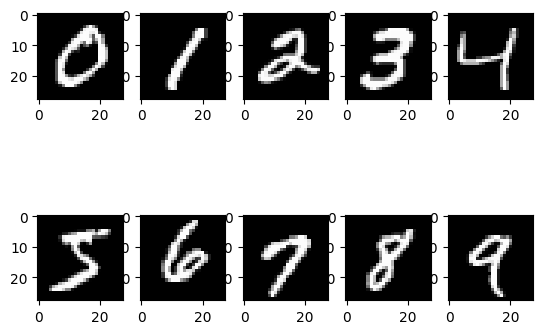

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0

# print(f"Train shape: {train_images.shape}")
# train_labels = train_labels.reshape(-1, 1)
# print(f"Test shape: {train_labels.shape}")

fig, ax = plt.subplots(2,5)
ax = ax.flatten()
for i in range(10):
    im_idx = np.argwhere(train_labels == i)[0]
    plottable_image = np.reshape(train_images[im_idx], (28,28))
    ax[i].imshow(plottable_image, cmap='gray')

<h1>Regular CNN<h1>

<h3>Baseline<h3>

This model will serve as the baseline for all the tests of the Regular CNN 

Batch Size - 32
Learning Rate - .001
Optimizer - Adam

The data for each of these tests is stored in the logs/fit/regular/tests/[learning_rate, batch_size, or optimizer]

I will test them in the following order: Learning Rate, Batch Size, Optimizer.

Since I will be testing in this order I will apply the best learning rate as the baseline for the batch size tests and the best learning rate + batch size for the optimizer tests

If the data shows that I will need to change the learning rate for the batch size and the learning rate + batch size for the optimizers I will.

In [5]:
CNN = 'Regular'
batch_size = 32
learning_rate = .001
optimizer = 'Adam'

model = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])



#Compile the model
model.compile(optimizer=Adam(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

model.summary()



c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,890 (1.51 MB)

 Trainable params: 394,890 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:


# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print("\nRegular Baseline")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8802 - loss: 0.3795
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9791 - loss: 0.0675
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0463
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9891 - loss: 0.0343
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9920 - loss: 0.0262
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9794 - loss: 19.4912

Regular Baseline
	Test loss: 12.996501922607422
	Test accuracy: 0.9851999878883362


In [ ]:
%tensorboard --logdir logs

<h2>Vary Learning Rates<h2>

In [7]:
learning_rates_arr = [.1,.01, .001, .0001, .00001]

for learning_rate in learning_rates_arr:
    CNN = 'Regular'
    batch_size = 32
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])


    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"regular/learning_rate_tests/{learning_rate}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])
    
    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"Regular Learning Rate - {learning_rate}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1076 - loss: 18.8255
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1043 - loss: 2.3136
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1036 - loss: 2.3166
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1037 - loss: 2.3140
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1034 - loss: 2.3129
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0936 - loss: 30588.1738
Regular Learning Rate - 0.1
	Test loss: 32680.748046875
	Test accuracy: 0.09669999778270721
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8892 - loss: 0.3744
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9579 - loss: 0.1669
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9631 - loss: 0.1473
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9670 - loss: 0.1397
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 

<h3>Varying Batch Sizes<h3>

In [8]:
batch_sizes_arr = [8, 16, 24, 32, 64, 128]

for batch_size in batch_sizes_arr:
    CNN = 'Regular'
    learning_rate = .001
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])


    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )


    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"regular/batch_size_tests/{batch_size}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])
    
    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nRegular Batch Size - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9012 - loss: 0.3046
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - accuracy: 0.9809 - loss: 0.0658
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 379s 51ms/step - accuracy: 0.9868 - loss: 0.0452
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.9890 - loss: 0.0364
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9906 - loss: 0.0319
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 22.0574

Regular Batch Size - 8
	Test loss: 20.006681442260742
	Test accuracy: 0.9810000061988831
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8891 - loss: 0.3393
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9808 - loss: 0.0646
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9860 - loss: 0.0447
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9900 - loss: 0.0331
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━

<h3>Varying Optimizers<h3>

In [ ]:
CNN = 'Regular'
batch_size = 32
learning_rate = .001
optimizer = 'SGD'

model = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=Adam(learning_rate), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
            )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"regular/optimizer_test/{optimizer}"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nRegular Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

In [ ]:
CNN = 'Regular'
batch_size = 32
learning_rate = .001
optimizer = 'RMSProp'

model = keras.models.Sequential([
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=Adam(learning_rate), 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']
            )

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"regular/optimizer_test/{optimizer}"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nRegular Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

In [ ]:
%tensorboard --logdir logs/fit/regular

<h1>Inverted CNN<h1>

<h3>Baseline<h3>

In [ ]:
CNN = 'Inverted'
batch_size = 32
learning_rate = .001
optimizer = 'Adam'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=Adam(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

model.summary()

# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"inverted/baseline"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])


# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nInverted Baseline")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

In [ ]:
# Train the model
# model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

In [ ]:
learning_rates_arr = [.1,.01, .001, .0001, .00001]

for learning_rate in learning_rates_arr:
    CNN = 'Inverted'
    batch_size = 32
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])


    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    model.summary()

    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"inverted/learning_rate_tests/{learning_rate}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])
    
    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nInverted Learning Rate - {learning_rate}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])


In [ ]:
batch_sizes_arr = [8, 16, 24,, 32, 64, 128]

for batch_size in batch_sizes_arr:
    CNN = 'Inverted'
    learning_rate = .001
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])


    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )


    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"inverted/batch_size_tests/{batch_size}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nInverted Batch Size - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

In [ ]:
CNN = 'Inverted'
batch_size = 32
learning_rate = .001
optimizer = 'SGD'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=SGD(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"inverted/optimizer_tests/SGD"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nInverted Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

CNN = 'Inverted'
batch_size = 32
learning_rate = .001
optimizer = 'RMSProp'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(32, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(16, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=RMSprop(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"inverted/optimizer_tests/RMSProp"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

print('RMSProp')

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nInverted Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

In [ ]:
%tensorboard --logdir logs/fit/inverted

<h1>Hourglass<h1>

<h3>Baseline<h3>

In [ ]:
CNN = 'Hourglass'
batch_size = 32
learning_rate = .001
optimizer = 'Adam'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=Adam(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"hourglass/baseline"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\nHourglass Baseline")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

In [ ]:
learning_rates_arr = [.1,.01, .001, .0001, .00001]

for learning_rate in learning_rates_arr:
    CNN = 'Hourglass'
    batch_size = 32
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )


    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"hourglass/learning_rate_tests/{learning_rate}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])
    
    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\Hourglass Learning Rate - {learning_rate}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])


In [ ]:
batch_sizes_arr = [8, 16, 24,, 32, 64, 128]

for batch_size in batch_sizes_arr:
    CNN = 'Hourglass'
    learning_rate = .001
    optimizer = 'Adam'

    model = keras.models.Sequential([
        keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )


    # Define the Keras TensorBoard callback.
    logdir="logs/fit/" + f"hourglass/batch_size_tests/{batch_size}"
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=5, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\Hourglass Batch Size - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

In [ ]:
CNN = 'Hourglass'
batch_size = 32
learning_rate = .001
optimizer = 'SGD'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=SGD(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"hourglass/optimizer_tests/SGD"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\Hourglass Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

CNN = 'Hourglass'
batch_size = 32
learning_rate = .001
optimizer = 'RMSProp'

model = keras.models.Sequential([
    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax'),
])


#Compile the model
model.compile(optimizer=RMSprop(learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )


# Define the Keras TensorBoard callback.
logdir="logs/fit/" + f"hourglass/optimizer_tests/RMSProp"
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

print('RMSProp')

# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=5, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print(f"\Hourglass Optimizer - {optimizer}")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

<h1>Question 2

In [14]:
# Load in the CIFAR-10 dataset
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

print(test_labels.shape)



(10000, 1)


In [12]:
model = keras.models.Sequential()

#Layer 1 Convolution layer with 6 kernels and kernel size of 5x5
model.add(keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))

#Layer 2 Max pooling layer with a kernel of 2x2 with stride of 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Layer 3 Convolution layer with 16 kernels and kernel size of 5x5
model.add(keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'))

#Layer 4 Max pooling layer with a kernel of 2x2 with stride of 2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Layer 5 Convolution layer with 120 kernels and kernel size of 5x5
model.add(keras.layers.Conv2D(120, kernel_size=(5,5), activation='relu'))

#Layer 6 Dense layer with 84 neurons
model.add(keras.layers.Dense(84, activation='relu'))

#Flatten the output of the previous layer
model.add(keras.layers.Flatten())

#Layer 7 Output Layer with 10 neurons
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

#Compile the model
model.compile(optimizer=Adam(.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1, 1, 84)       │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model
model.fit(
    train_images, 
    train_labels, 
    epochs=25, 
    batch_size = batch_size,
    callbacks=[tensorboard_callback])

# Evaluate
score = model.evaluate(test_images, test_labels)
print("\nLeNet Baseline")
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2654 - loss: 1.9969
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4410 - loss: 1.5481
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4917 - loss: 1.4120
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5215 - loss: 1.3249
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5543 - loss: 1.2465
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5744 - loss: 1.2007
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5868 - loss: 1.1595
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6009 - loss: 1.1235
Epoch 9/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6154 - loss: 1.0893
Epoch 10/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6262 - loss: 1.0617
Epoch 11/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6331 - loss: 1.0284
Epoch 12/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [47]:
learning_rates_arr = [.1,.01, .001, .0025, .0001, .00001]

for learning_rate in learning_rates_arr:
    model = keras.models.Sequential([
        keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(120, kernel_size=(5,5), activation='relu'),
        keras.layers.Dense(84, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=25, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nLeNet Learning Rate - {learning_rate}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0986 - loss: 19.3048
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1006 - loss: 2.3086
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1015 - loss: 2.3078
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0997 - loss: 2.3092
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0992 - loss: 2.3076
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1010 - loss: 2.3094
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1010 - loss: 2.3084
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0961 - loss: 2.3099
Epoch 9/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1025 - loss: 2.3076
Epoch 10/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0994 - loss: 2.3083
Epoch 11/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0975 - loss: 2.3081
Epoch 12/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/ste

In [48]:
batch_sizes_arr = [8, 16, 32, 64, 128]

for batch_size in batch_sizes_arr:
    model = keras.models.Sequential([
        keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(120, kernel_size=(5,5), activation='relu'),
        keras.layers.Dense(84, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(.001), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    # Train the model
    model.fit(
        train_images, 
        train_labels, 
        epochs=25, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nLeNet Batch Sizes - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3362 - loss: 1.7883
Epoch 2/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5321 - loss: 1.3085
Epoch 3/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5820 - loss: 1.1773
Epoch 4/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6114 - loss: 1.0993
Epoch 5/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6342 - loss: 1.0390
Epoch 6/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6498 - loss: 0.9908
Epoch 7/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6637 - loss: 0.9503
Epoch 8/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6819 - loss: 0.9021
Epoch 9/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6910 - loss: 0.8752
Epoch 10/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6993 - loss: 0.8530
Epoch 11/25
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7067 - loss: 0.8247
Epoch 12/25
6250/62

In [15]:

    learning_rate = .009
    batch_size = 25

    model = keras.models.Sequential([
        keras.layers.Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(16, kernel_size=(5,5), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
        keras.layers.Conv2D(120, kernel_size=(5,5), activation='relu'),
        keras.layers.Dense(84, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation='softmax'),
    ])

    #Compile the model
    model.compile(optimizer=Adam(learning_rate), 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy']
                )

    # Train the model
    model.fit(
        train_images,
        train_labels, 
        epochs=10, 
        batch_size = batch_size,
        callbacks=[tensorboard_callback])

    # Evaluate
    score = model.evaluate(test_images, test_labels)
    print(f"\nLeNet Batch Sizes - {batch_size}")
    print('\tTest loss:', score[0])
    print('\tTest accuracy:', score[1])

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3062 - loss: 1.8752
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4877 - loss: 1.4195
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5414 - loss: 1.2793
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5749 - loss: 1.1993
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5897 - loss: 1.1460
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6114 - loss: 1.1014
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6281 - loss: 1.0527
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6369 - loss: 1.0267
Epoch 9/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6489 - loss: 0.9910
Epoch 10/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6533 - loss: 0.9741
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6044 - loss: 1.1265


NameError: name 'batch_size' is not defined